## Support Vector Machines

In this notebook I show how to train Support Vector Machines with different kernels and use Matplotlib to plot the trained models.  These examples are based on examples provided by scikit-learn using the Iris dataset with Support Vector Machines. The main change is that we are using two datasets consisting of audio features for the task of **genre classification**. They are calculated using Marsyas, an open source software for audio analysis. The first dataset used in the code contains just two song level features (average spectral centroid and average spectral rolloff). That way the data can be visualized directly with a scatter plot. The points are colored in terms of their class membership. There are three genres each represented by a 100 tracks (instances) or points in this case. The genres are classical, jazz and metal.

http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html

In [23]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm

In [24]:
# Function to generate a Mesh Grid where feature 1 is x and feature 2 is y
def make_mesh(x, y, padding=.1, h=.005):
    x_min, x_max = x.min()-padding, x.max()+padding
    y_min, y_max = y.min()-padding, y.max()+padding

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

### Some Toy Data sets

In [53]:
X_doughnut = np.array([
    # Points in the 'doughnut'
    (0, 6), (0, 5), (0, 4), (0, 3),
    (1, 7), (1, 6), (1, 5), (1, 4), (1, 3), (1, 2), 
    (2, 7), (2, 2), (2, 1), (3, 8), (3, 7), (3, 1), (3, 0), 
    (4, 8), (4, 7), (4, 1), (4, 0), 
    (5, 8), (5, 7), (5, 1), (5, 0), (6, 7), (6, 6), (6, 2), (6, 1), 
    (7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (8, 5), (8, 4), (8, 3), 
    # Points in the center of the 'doughnut'
    (3, 5), (3, 4), (4, 5), (4, 4), (4, 3), (5, 4),
])

y_doughnut = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    1, 1, 1, 1, 1, 1, 
])

X_test_doughnut = np.array([
    (5, 6), (5, 5), (3, 3), (3, 2), (5.2, 5.2), (5.4, 5.4), (5.6, 5.6),(5.8, 5.8), 
])

y_test_doughnut = np.array([0, 1, 1, 0, 0, 0, 0, 0])

### Maximum Margin Seperating Hyperplane

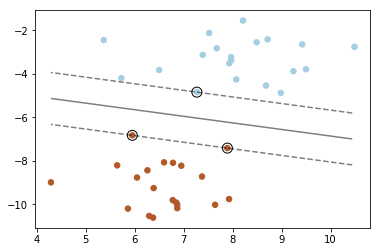

In [66]:
# we create 40 separable points

# Load some toy data examples for visualization
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
# X, y = X_doughnut, y_doughnut

# fit the model, don't regularize 
clf = svm.SVC(kernel='linear', C=1) ## Try with different Kernels
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired, zorder=10)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx, yy = make_mesh(X[:, 0], X[:, 1], padding=0, h=.05)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot decision boundary and margins
ax.contour(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, colors='k',
           linestyles=['--', '-', '--'], zorder=11)
# # plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolor='k', zorder=10)

### Load Genre Dataset

In [58]:
# Load dataset with only two features for visualization
(X, y) = datasets.load_svmlight_file("data/3genres.arff.libsvm")
X = X.toarray()

# Scale the data to between 0 and 1
X = MinMaxScaler().fit_transform(X)

#Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y)

target_names = ['classical', 'jazz', 'metal']

### Create and Train SVMs with different Kernels

In [63]:
kernels = ["linear", "rbf", "poly"]
C = .3 # regularization parameter

gamma = 5
models = (svm.SVC(kernel="linear", C=C), 
          svm.LinearSVC(C=C),
          svm.SVC(kernel="rbf", gamma=gamma, C=C),
          svm.SVC(kernel="poly", gamma=gamma, degree=3, C=C))

titles = ("SVC w/ Linear Kernel",
          "LinearSVC",
          "SVC w/ RBF Kernel",
          "SVC w/ 3 Degree Polynomial kernel")
#train the models
models = (clf.fit(X_train, y_train) for clf in models)

### Plot the Models

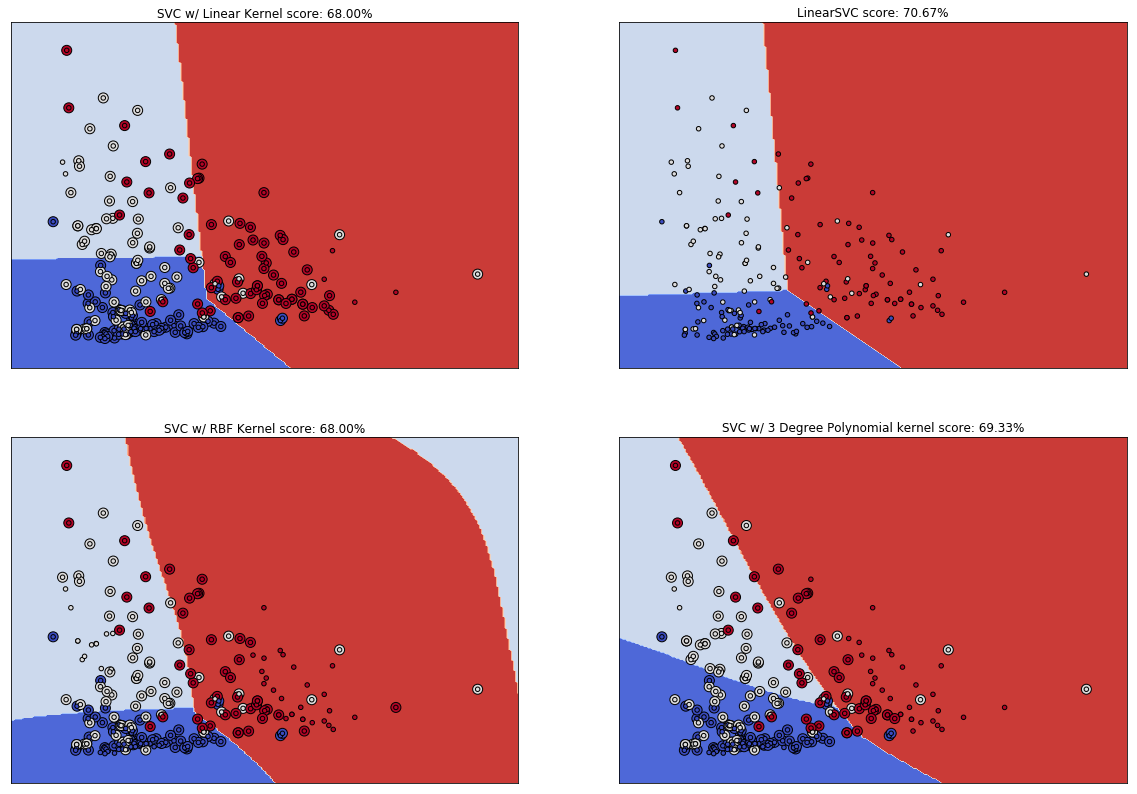

In [64]:
fig, sub = plt.subplots(2,2, figsize=(20,14))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# make mesh for plotting
xx, yy = make_mesh(X[:, 0], X[:, 1], padding=.1, h=.005)

for clf, title, ax in zip(models, titles, sub.flatten()):
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    score = clf.score(X_test, y_test)
    Z = Z.reshape(xx.shape)

    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.coolwarm, zorder=11, edgecolor='k', s=20)
#     ax.scatter(X_test[:,0], X_test[:,1], c=y_test, s=50, zorder=10, edgecolor='k',cmap=plt.cm.coolwarm)

    if title != "LinearSVC":
        sv = clf.support_
        X_support = X_train[sv]
        y_support = y_train[sv]
        ax.scatter(X_support[:,0], X_support[:, 1], c=y_support, cmap=plt.cm.coolwarm, 
                   s=100, zorder=10, edgecolor='k')

    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
    ax.set_title("{} score: {:.2f}%".format(title, score*100))
    ax.set_xticks(())
    ax.set_yticks(())

### Lab Exercises

In [8]:
# Create plots to visualize models trained with different training parameters, such as C and gamma
# How do these parameters affect the model?

In [9]:
# Plot with binary classification problem ()

In [10]:
# Compare SVM with Perceptron
# Visualize with 2 features
# Compare results with All 120 Features
#     Use: (X, y) = datasets.load_svmlight_file("data/3genres_full.arff.libsvm")